In [35]:
import numpy as np
from astropy.cosmology import FlatLambdaCDM, Planck15
import astropy.constants as const
import matplotlib.pyplot as plt
from scipy.integrate import simps, quad

# PATCHY Mocks cosmology

The reference catalogues are extracted from one of the BigMultiDark simulations10 (Klypin et al. 2014), which was performed using gadget-2 (Springel et al. 2005) with 3, 8403
particles on a volume of (2.5 h
−1Mpc )3
assuming Λ cold
dark matter Planck cosmology with {ΩM = 0.307115, Ωb =
0.048206, σ8 = 0.8288, ns = 0.9611}, and a Hubble constant
(H0 = 100 hkm s−1 Mpc−1
) given by h = 0.6777. Haloes
were defined based on the Bound Density Maximum halo
finder (Klypin & Holtzman 1997).

In [95]:
h = 0.6777
Omega_m = 0.307115
Omega_b = 0.048206
sigma8 = 0.8288
n_s = 0.9611
patchy_cosmo = FlatLambdaCDM(H0=100 * h, Om0=Omega_m, Ob0=Omega_b, Tcmb0=2.725)

def R(z, cosmo):
    return (3/4) * cosmo.Ob0 * (1+z)**3 / (cosmo.Ogamma0 * (1+z)**4)

def c_s(z, cosmo):
    return const.c.to('km/s').value / np.sqrt(3 * (1+R(z,cosmo))) #km/s
def r_s(zarr, cosmo):
    rs = simps(c_s(z, cosmo) / cosmo.H(z), zarr)
    return rs * cosmo.h

def E(z, cosmo):
    return np.sqrt(cosmo.Ode0 + cosmo.Om0*(1+z)**3 + cosmo.Ogamma0*(1+z)**4)

def H(z, cosmo):
    return cosmo.H0.value * E(z, cosmo)

def r_s_quad(z, cosmo):
    rs,err = quad(lambda z, cosmo: c_s(z,cosmo) / cosmo.H(z).value, z, np.inf, args=(cosmo))
    return rs * cosmo.h


In [106]:
z_eq = (patchy_cosmo.Om0/patchy_cosmo.Ogamma0) - 1
z_rec = 1060
z = np.linspace(z_rec, 1e9, 10000000)
rs = r_s(z, patchy_cosmo)
print(rs)

100.05599303828275


In [107]:
r_s_quad(z_rec, patchy_cosmo)

100.04950776903439

0.0026887816783635436


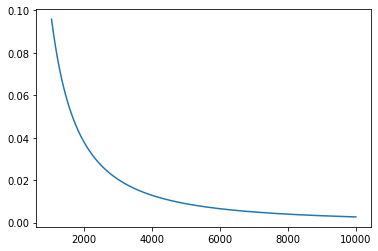

In [103]:
z = np.linspace(1060, 1e4, 10000)
integrand = c_s(z,patchy_cosmo) / H(z,patchy_cosmo)
plt.plot(z,integrand)
print(integrand[-1])